<h1 align="center">Assignment</h1>
<h3 align="center">Faisal Akhtar</h3>
<h3 align="center">Roll No.: 17/1409</h3>
<p>Machine Learning - B.Sc. Hons Computer Science - VIth Semester</p>
<p>Using SVM, perform classification on Iris Datset.</p>

In [1]:
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
iris_dataset = datasets.load_iris()
print ("Iris data set Description :: ", iris_dataset['DESCR'])
print ("Iris feature data :: ", iris_dataset['data'])
print ("Iris target :: ", iris_dataset['target'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

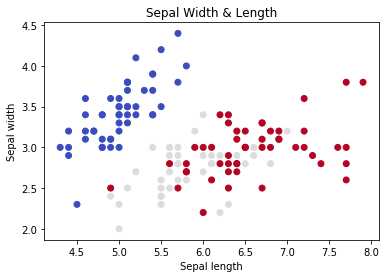

In [3]:
def visuvalize_sepal_data():
	iris = datasets.load_iris()
	X = iris.data[:, :2]  # we only take the first two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Sepal length')
	plt.ylabel('Sepal width')
	plt.title('Sepal Width & Length')
	plt.show()
 
visuvalize_sepal_data()

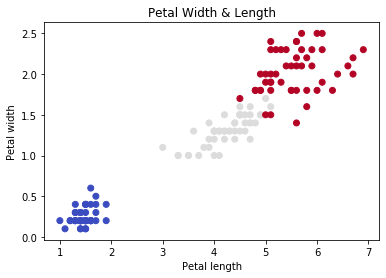

In [4]:
def visuvalize_petal_data():
	iris = datasets.load_iris()
	X = iris.data[:, 2:]  # we only take the last two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Petal length')
	plt.ylabel('Petal width')
	plt.title('Petal Width & Length')
	plt.show()

visuvalize_petal_data()

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the Sepal two features.
y = iris.target
C = 1.0  # SVM regularization parameter

In [6]:
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))

In [8]:
# title for the plots
titles = ['SVC with linear kernel',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']

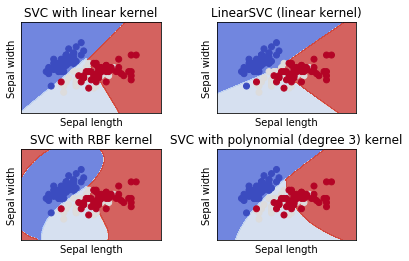

In [9]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])
 
plt.show()